In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [ ]:
df=pd.read_csv("OnlineRetail.csv")

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,15287,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,15287,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,15287,United Kingdom


In [ ]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,539392.000000
mean,9.845904,4.673648,15287.600185
std,215.412652,94.614722,1488.109389
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df['Transaction'] = df['Quantity'].apply(lambda x: 'Sold' if x < 0 else 'Bought')

<ipython-input-12-ec9eece4331f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850,United Kingdom,Bought
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850,United Kingdom,Bought
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought


In [ ]:
df['Transaction'].value_counts()

Transaction
Bought    530104
Sold        9288
Name: count, dtype: int64

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26:00,2.55,17850,United Kingdom,Bought
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26:00,2.75,17850,United Kingdom,Bought
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26:00,3.39,17850,United Kingdom,Bought
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought


In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Transaction    0
dtype: int64

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M:%S')

<ipython-input-17-de41318d7bd0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-de41318d7bd0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-de41318d7bd0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['total_amount'] = df['UnitPrice'] * df['Quantity']

<ipython-input-18-223d69ef80ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34


In [ ]:
# product_description_onehot = pd.get_dummies(df['Description'])
# country_onehot = pd.get_dummies(df['Country'])
# transaction_onehot = pd.get_dummies(df['Transaction'])

# # Concatenate one-hot encoded features with original dataframe
# df = pd.concat([df, product_description_onehot, country_onehot, transaction_onehot], axis=1)

In [ ]:
le = LabelEncoder()
df['Product_Description'] = le.fit_transform(df['Description'])
df['Product_Country'] = le.fit_transform(df['Country'])
df['Product_Transaction'] = le.fit_transform(df['Transaction'])

<ipython-input-20-1f28c5b16039>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-1f28c5b16039>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-1f28c5b16039>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,total_amount,Product_Description,Product_Country,Product_Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00,15.30,3848,36,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34,3856,36,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00,22.00,879,36,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34,1857,36,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,20.34,2849,36,0


In [ ]:
sorted_df = df.sort_values(by=['Quantity'], ascending=False)

customer_id = sorted_df.iloc[0]['CustomerID']
highest_quantity = sorted_df.iloc[0]['Quantity']

print(f"CustomerID {customer_id} bought the highest quantity of {highest_quantity}.")

CustomerID 16446 bought the highest quantity of 80995.


In [ ]:
customer_totals = df.groupby('CustomerID')['Quantity'].sum()

sorted_totals = customer_totals.sort_values(ascending=False)

top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)


Top 10 Customers by Quantity:
CustomerID
15287    418230
14646    196143
12415     76946
14911     76930
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
Name: Quantity, dtype: int64


In [ ]:
df['Time'] = df['InvoiceDate'].dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 else ('Morning' if x < 12 else ('Noon' if x < 14 else ('Afternoon' if x < 18 else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

<ipython-input-24-ff96e29ae8b4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-ff96e29ae8b4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,total_amount,Product_Description,Product_Country,Product_Transaction,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,8,15.30,3848,36,0,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,3856,36,0,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,8,22.00,879,36,0,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,1857,36,0,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,2849,36,0,Morning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539392 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            539392 non-null  object        
 1   StockCode            539392 non-null  object        
 2   Description          539392 non-null  object        
 3   Quantity             539392 non-null  int64         
 4   InvoiceDate          539392 non-null  datetime64[ns]
 5   UnitPrice            539392 non-null  float64       
 6   CustomerID           539392 non-null  int64         
 7   Country              539392 non-null  object        
 8   Transaction          539392 non-null  object        
 9   Date                 539392 non-null  object        
 10  Time                 539392 non-null  int32         
 11  total_amount         539392 non-null  float64       
 12  Product_Description  539392 non-null  int64         
 13  Product_Country    

<ipython-input-27-0b7179044271>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




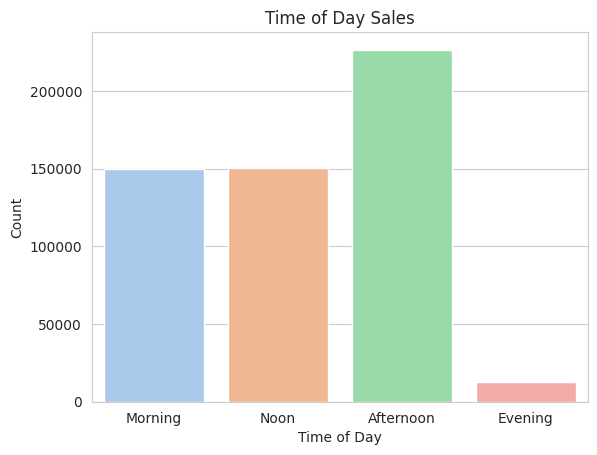

In [ ]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='Time of Day', palette="pastel")

plt.xlabel("Time of Day")

plt.ylabel("Count")

plt.title("Time of Day Sales")

plt.show()

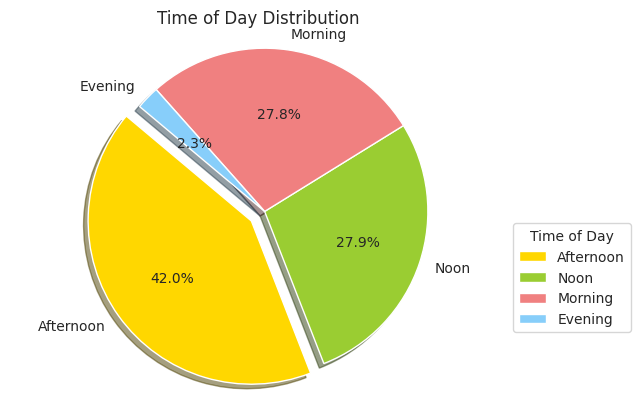

In [ ]:
counts = df['Time of Day'].value_counts()

labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
customer_invoice_quantity = df.groupby('CustomerID').agg({'InvoiceNo': 'max', 'Quantity': 'sum'})

highest_invoice_customer = customer_invoice_quantity[customer_invoice_quantity['Quantity'] == customer_invoice_quantity['Quantity'].max()]

highest_invoice_no = highest_invoice_customer['InvoiceNo'].values[0]
highest_invoice_quantity = highest_invoice_customer['Quantity'].values[0]

print("Highest Invoice Number for Customer ID:", highest_invoice_no)
print("Total Quantity in Highest Invoice for Customer ID:", highest_invoice_quantity)

Highest Invoice Number for Customer ID: C580605
Total Quantity in Highest Invoice for Customer ID: 418230


In [ ]:
highest_invoice_customer

,InvoiceNo,Quantity
CustomerID,,
15287,C580605,418230


In [ ]:
transactions_per_month = df.groupby(['Country', df['InvoiceDate'].dt.strftime('%m-%Y')]).size().reset_index(name='Transaction Count')

In [ ]:
transactions_per_month

,Country,InvoiceDate,Transaction Count
0,Australia,01-2011,127
1,Australia,02-2011,91
2,Australia,03-2011,110
3,Australia,04-2011,20
4,Australia,05-2011,117
...,...,...,...
309,Unspecified,06-2011,9
310,Unspecified,07-2011,221
311,Unspecified,08-2011,23
312,Unspecified,09-2011,66


In [ ]:
total_transactions_by_country = transactions_per_month.groupby('Country')['Transaction Count'].sum()

In [ ]:
total_transactions_by_country

Country
Australia                 1256
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8192
European Community          61
Finland                    695
France                    8556
Germany                   9493
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2367
Norway                    1085
Poland                     341
Portugal                  1519
RSA                         57
Saudi Arabia                10
Singapore                  229
Spain                     2532


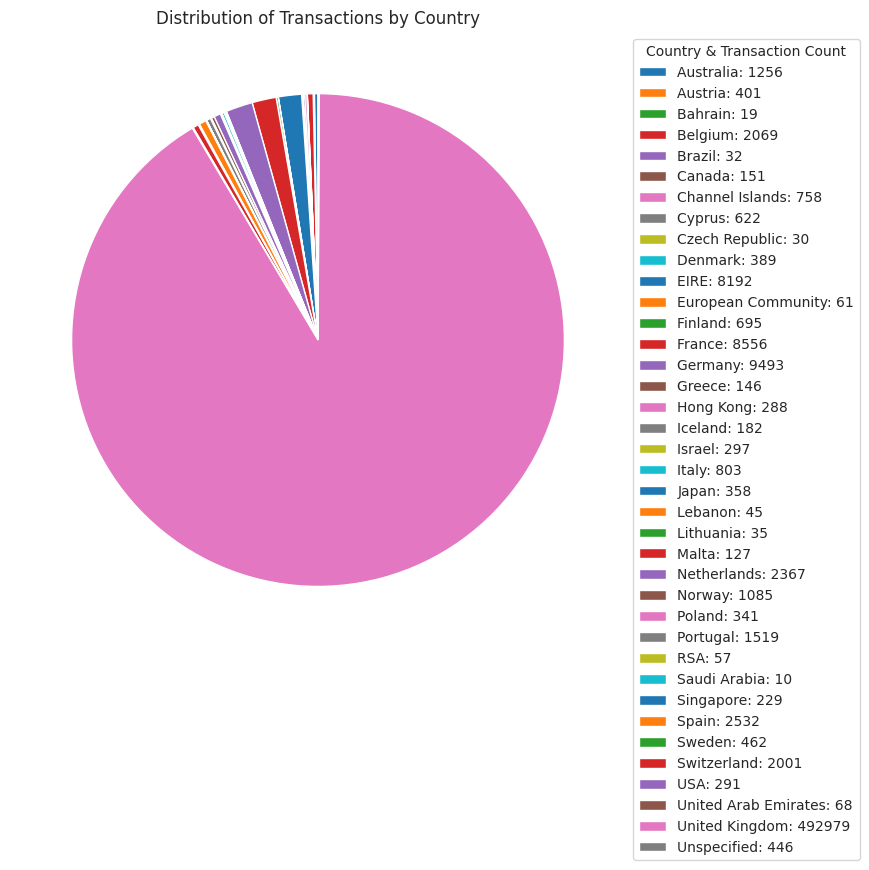

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(total_transactions_by_country, labels=None, autopct=None, startangle=90)
ax.set_title('Distribution of Transactions by Country')

legend_labels = [f"{country}: {count}" for country, count in zip(total_transactions_by_country.index, total_transactions_by_country.values)]
ax.legend(legend_labels, title='Country & Transaction Count', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [ ]:
total_transactions_by_country = transactions_per_month.groupby('Country')['Transaction Count'].sum().reset_index()

total_transactions_by_country = total_transactions_by_country.sort_values('Transaction Count', ascending=False)

fig = px.treemap(total_transactions_by_country,
                 path=['Country'],
                 values='Transaction Count',
                 color='Country',
                 color_discrete_sequence=px.colors.qualitative.Prism,
                 title='Distribution of Transactions by Country (Treemap)',
                 )

fig.show()

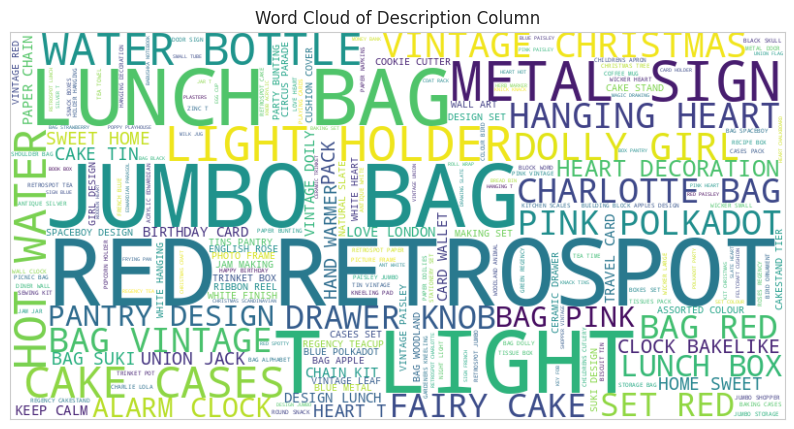

In [ ]:
text = ' '.join(df['Description'].dropna().astype(str).values)

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

fig, ax = plt.subplots(figsize=(10, 6))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Word Cloud of Description Column')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

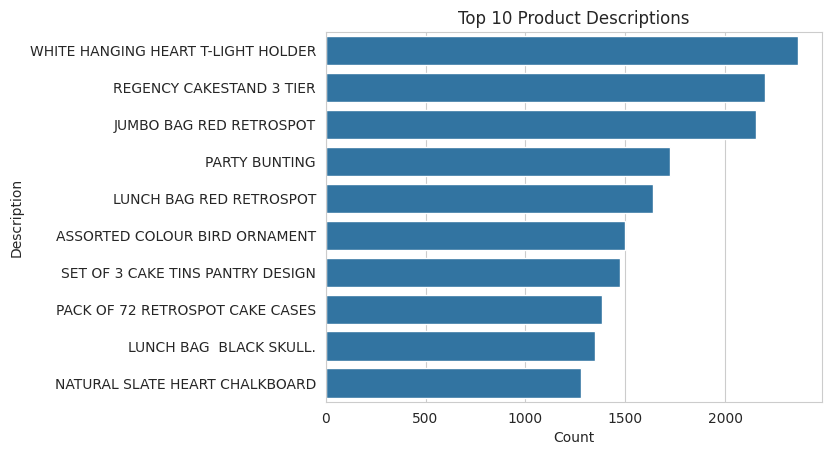

In [ ]:
top_10_descriptions = df['Description'].value_counts().nlargest(10)

sns.barplot(x=top_10_descriptions.values, y=top_10_descriptions.index)
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Product Descriptions')
plt.show()

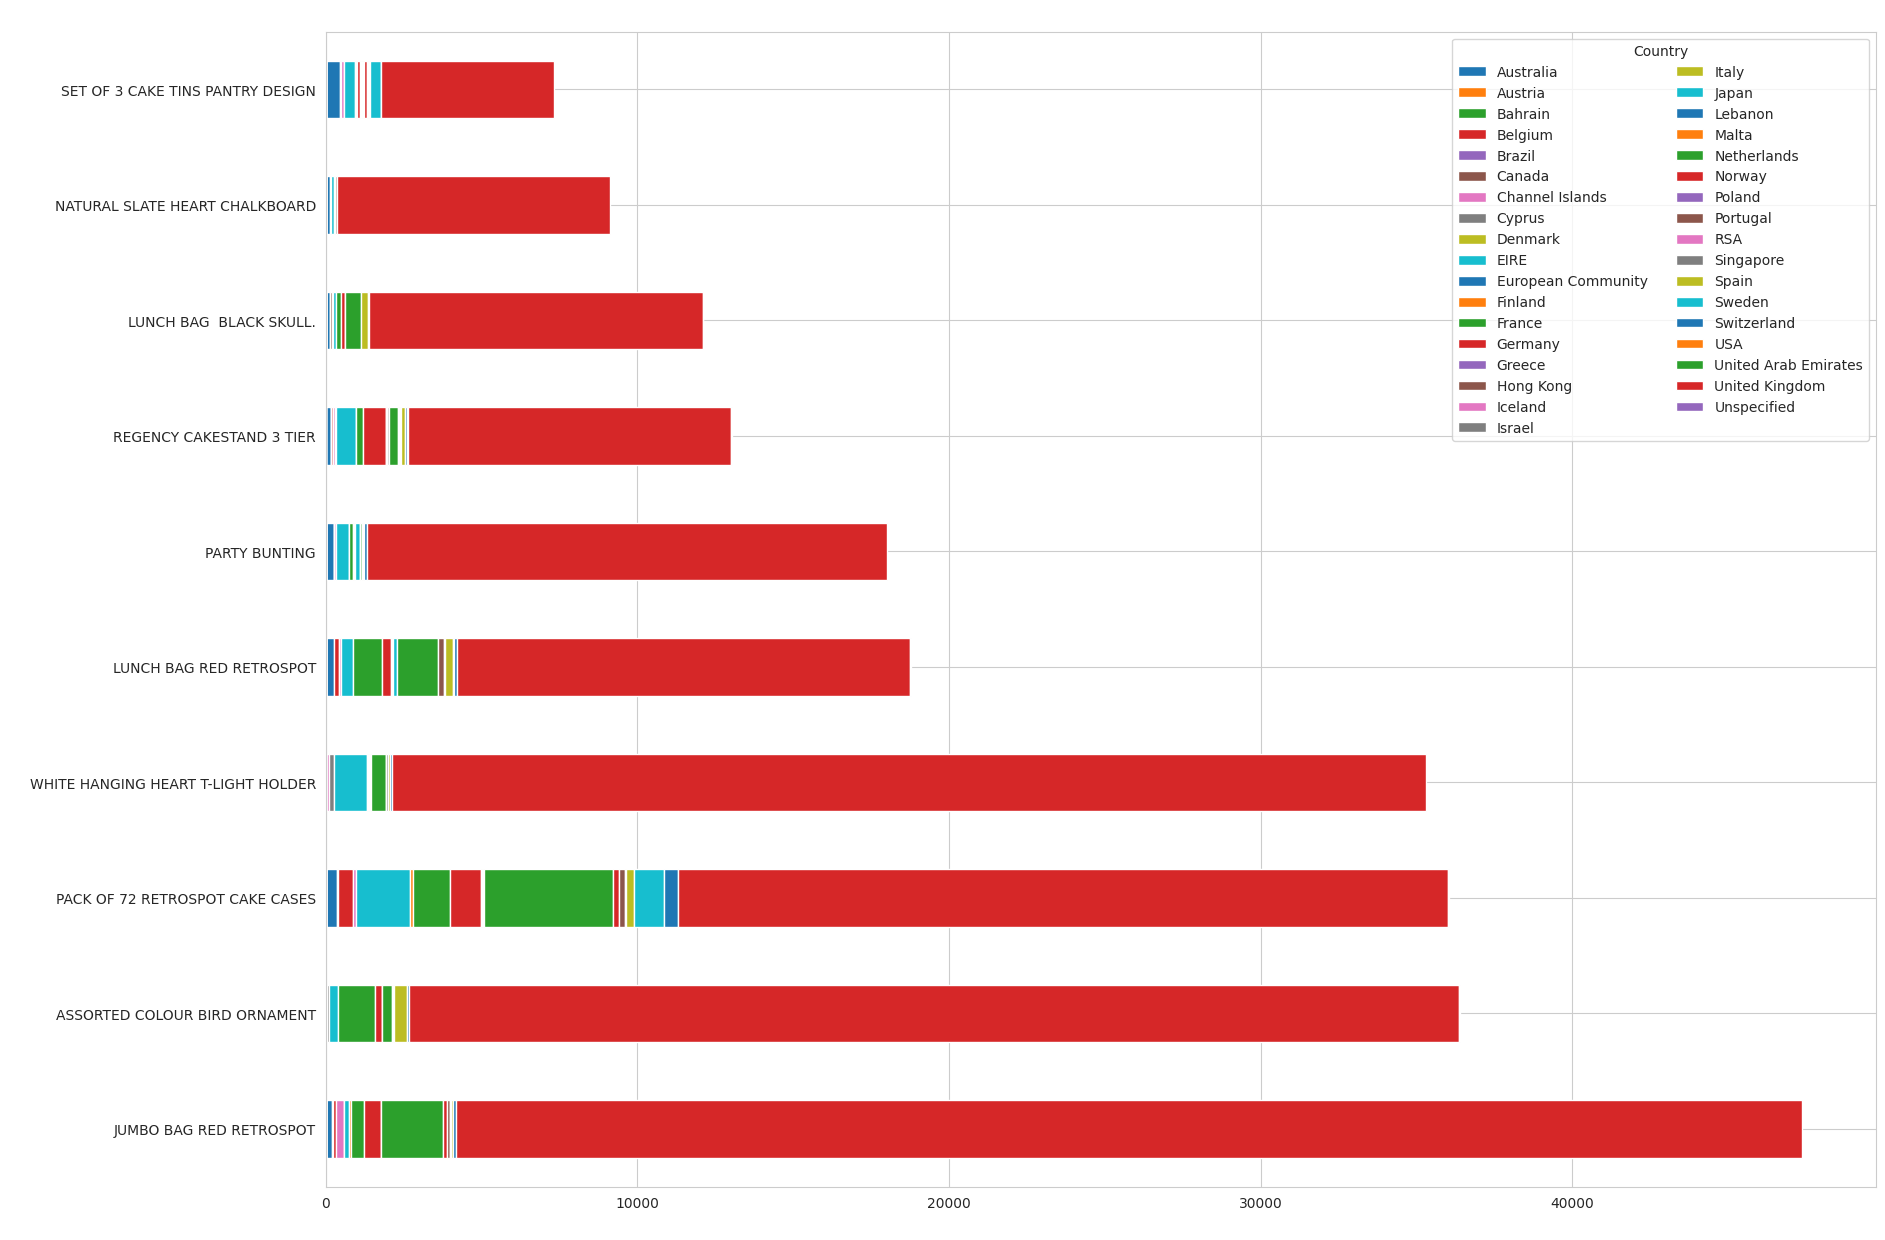

In [ ]:
top_10_descriptions = df['Description'].value_counts().nlargest(10)

df_top_10 = df[df['Description'].isin(top_10_descriptions.index)]

grouped = df_top_10.groupby(['Description', 'Country'], as_index=False)['Quantity'].sum()

pivot = grouped.pivot(index='Description', columns='Country', values='Quantity')

pivot['Total'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by='Total', ascending=False).drop('Total', axis=1)

fig, ax = plt.subplots(figsize=(20, 15))
pivot.plot(kind='barh', stacked=True, ax=ax)

plt.xlabel('Quantity', color='white')
plt.ylabel('Description', color='white')
plt.title('Top 10 Product Descriptions by Country', color='white')

ax.legend(title='Country', ncol=2)

plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,total_amount,Product_Description,Product_Country,Product_Transaction,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,8,15.30,3848,36,0,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,3856,36,0,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,8,22.00,879,36,0,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,1857,36,0,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,20.34,2849,36,0,Morning


In [ ]:
y = df['Country']
X = df[['Product_Description','UnitPrice', 'Product_Transaction', 'Quantity','total_amount']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()

X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
y_pred

array(['United Kingdom', 'United Kingdom', 'United Kingdom', ...,
       'United Kingdom', 'United Kingdom', 'United Kingdom'], dtype=object)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9074889459487018


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                      precision    recall  f1-score   support

           Australia       0.16      0.09      0.11       267
             Austria       0.00      0.00      0.00        86
             Bahrain       0.00      0.00      0.00         5
             Belgium       0.23      0.04      0.07       411
              Brazil       0.00      0.00      0.00         9
              Canada       0.00      0.00      0.00        30
     Channel Islands       0.00      0.00      0.00       130
              Cyprus       0.04      0.01      0.01       133
      Czech Republic       0.00      0.00      0.00         5
             Denmark       0.07      0.03      0.04        67
                EIRE       0.21      0.04      0.07      1633
  European Community       0.00      0.00      0.00        11
             Finland       0.18      0.05      0.08       147
              France       0.21      0.04      0.07      1748
             Germany       0.28      0.07      0.12      1868
       

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = classification_report(y_test, y_pred, output_dict=True)['macro avg']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['macro avg']['recall']
f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9074889459487018
Precision: 0.12600562067226265
Recall: 0.058083712933930796
F1-score: 0.07107526763752828


In [ ]:
# Predictions
def predict_product_country(Product_Description,UnitPrice, Product_Transaction, Quantity,total_amount):
    input_data = pd.DataFrame({'Product_Description':[Product_Description],'UnitPrice': [UnitPrice],'Product_Transaction':[Product_Transaction] ,'Quantity': [Quantity],'total_amount': [total_amount]})
    prediction = dt_model.predict(input_data)
    return prediction

# Example usage
Product_Description1 = 3656
UnitPrice1 = 3.39
Product_Transaction1 = 0
Quantity1 = 2
total_amount1 = 6.78

prediction = predict_product_country(Product_Description1,UnitPrice1, Product_Transaction1, Quantity1,total_amount1)
print('Predicted country:', prediction)

Predicted country: ['EIRE']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

